## Лабораторная работа №1
   Назаров А.М. НПМ-01-22

#### Задание 1

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [9]:
import cvxopt as cp
import numpy as np

# Определение матриц и векторов для задачи квадратичного программирования
# Квадратичная функция цели: f(x) = -8*x1 - 16*x2 + x1^2 + 4*x2^2
# Здесь Q = [[2, 0], [0, 8]] представляет квадратичные члены, а p = [-8, -16] - линейные члены
Q = cp.matrix([[2.0, 0.0], [0.0, 8.0]])  # Матрица
p = cp.matrix([-8.0, -16.0])  # Вектор


# Ограничения:
# - x1 >= 0  (x1 >= 0)
# - x1 <= 3  (x1 <= 3)
# - x2 >= 0  (x2 >= 0)
# - x1 + x2 <= 5  (x1 + x2 <= 5)
# Матрица G и вектор h используются для описания этих ограничений в формате Gx <= h
G = cp.matrix([
    [1.0, 0.0, 0.0, 1.0],  # -x1 (x1 >= 0) и -x2 (x2 >= 0)
    [0.0, 1.0, -1.0, 0.0],  # x1 (x1 <= 3) и -x2 (y >= 0)
], tc='d')
h = cp.matrix([0.0, 3.0, 0.0, 5.0], tc='d')  # Вектор

# Решение задачи квадратичного программирования
solution = cp.solvers.qp(Q, p, G, h)

# Извлечение оптимальных значений переменных и функции цели из решения
optimal_x = np.array(solution['x']).flatten()  # Оптимальные значения переменных
optimal_value = solution['primal objective']  # Оптимальное значение функции цели

# Вывод результатов
print(f"Оптимальное значение x1: {optimal_x[0]}")
print(f"Оптимальное значение x2: {optimal_x[1]}")
print(f"Оптимальное значение функции: {optimal_value}")

# Определение активных ограничений
# Активные ограничения - это те, которые равны нулю при достижении оптимума
#Проверка, какие из ограничений активны в оптимальной точке. Активное ограничение — это ограничение, которое строго ограничивает решение в оптимальной точке (т.е. уравнение точно выполняется).
#np.isclose используется для проверки, близки ли значения переменных к краевым значениям ограничений.
active_constraints = []
if np.isclose(optimal_x[0], 0):
    active_constraints.append("x1 >= 0")
if np.isclose(optimal_x[0], 3):
    active_constraints.append("x1 <= 3")
if np.isclose(optimal_x[1], 0):
    active_constraints.append("x2 >= 0")
if np.isclose(optimal_x[0] + optimal_x[1], 5):
    active_constraints.append("x1 + x2 <= 5")

print("Активные ограничения:")
for constraint in active_constraints:
    print(f"- {constraint}")


     pcost       dcost       gap    pres   dres
 0: -3.1397e+01 -1.7302e+01  3e+01  1e+00  3e-01
 1: -1.7291e+01 -1.8597e+01  3e+00  6e-02  1e-02
 2: -1.6017e+01 -1.6091e+01  9e-02  8e-04  2e-04
 3: -1.6000e+01 -1.6001e+01  9e-04  8e-06  2e-06
 4: -1.6000e+01 -1.6000e+01  9e-06  8e-08  2e-08
Optimal solution found.
Оптимальное значение x1: 2.194231143314666e-07
Оптимальное значение x2: 1.9999991098257488
Оптимальное значение функции: -16.000001755381696
Активные ограничения:


#### Задание 2
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

     pcost       dcost       gap    pres   dres
 0: -5.6628e+00 -1.5214e+01  4e+02  2e+01  5e-14
 1: -1.1024e+00 -1.3616e+01  3e+01  1e+00  5e-14
 2: -4.5905e-01 -4.5615e+00  5e+00  9e-02  7e-15
 3: -2.8388e-01 -8.4465e-01  7e-01  1e-02  3e-15
 4: -3.3780e-01 -5.5355e-01  2e-01  3e-03  3e-15
 5: -3.6743e-01 -4.3508e-01  7e-02  7e-04  3e-15
 6: -3.7981e-01 -4.0411e-01  3e-02  9e-05  3e-15
 7: -3.8923e-01 -3.8987e-01  7e-04  2e-06  4e-15
 8: -3.8946e-01 -3.8947e-01  7e-06  3e-08  5e-15
 9: -3.8947e-01 -3.8947e-01  7e-08  3e-10  5e-15
Optimal solution found.


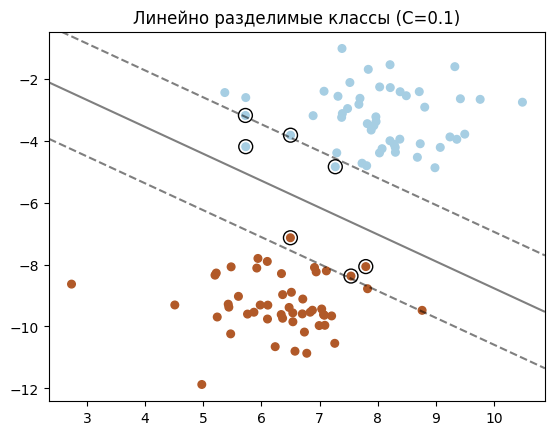

     pcost       dcost       gap    pres   dres
 0: -2.0927e+01 -2.0462e+01  6e+02  2e+01  1e-15
 1: -3.6005e+00 -1.9363e+01  2e+01  2e-01  8e-16
 2: -3.6977e+00 -5.6604e+00  2e+00  1e-02  5e-16
 3: -4.2574e+00 -4.6775e+00  4e-01  2e-03  5e-16
 4: -4.4225e+00 -4.5069e+00  9e-02  3e-04  5e-16
 5: -4.4520e+00 -4.4714e+00  2e-02  6e-05  5e-16
 6: -4.4600e+00 -4.4621e+00  2e-03  5e-06  5e-16
 7: -4.4609e+00 -4.4611e+00  2e-04  4e-07  5e-16
 8: -4.4610e+00 -4.4611e+00  8e-05  2e-07  5e-16
 9: -4.4610e+00 -4.4610e+00  2e-05  1e-08  5e-16
10: -4.4610e+00 -4.4610e+00  2e-07  1e-10  5e-16
Optimal solution found.


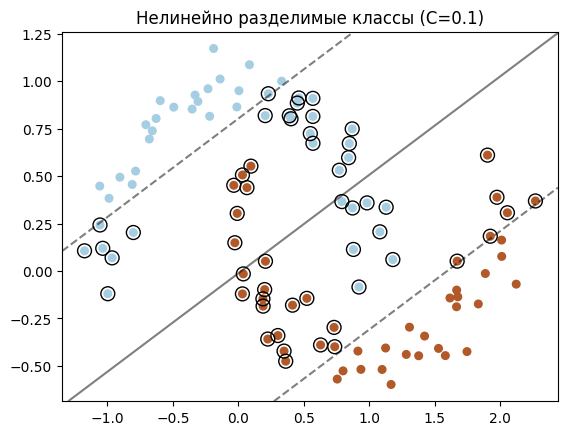

     pcost       dcost       gap    pres   dres
 0: -5.4999e+01 -2.0047e+01  4e+02  2e+01  9e-16
 1: -8.0232e+00 -1.9261e+01  1e+01  3e-15  1e-15
 2: -9.3962e+00 -1.0100e+01  7e-01  3e-16  7e-16
 3: -9.9931e+00 -1.0001e+01  8e-03  2e-16  6e-16
 4: -9.9997e+00 -9.9998e+00  8e-05  2e-16  6e-16
 5: -9.9997e+00 -9.9997e+00  8e-07  2e-16  6e-16
Optimal solution found.


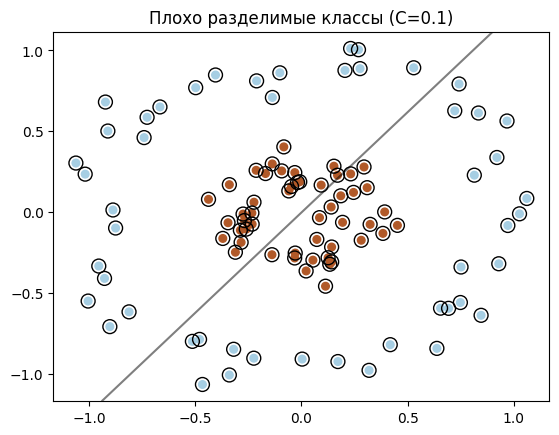

     pcost       dcost       gap    pres   dres
 0: -1.0203e+01 -1.9388e+02  1e+03  3e+00  9e-14
 1: -5.4861e+00 -1.0114e+02  2e+02  3e-01  6e-14
 2: -1.3027e+00 -1.2756e+01  2e+01  3e-02  3e-14
 3: -5.0608e-01 -2.0845e+00  2e+00  2e-03  1e-14
 4: -7.8094e-01 -1.1346e+00  4e-01  3e-04  1e-14
 5: -8.8188e-01 -9.2768e-01  5e-02  2e-05  1e-14
 6: -9.0083e-01 -9.0144e-01  6e-04  2e-07  1e-14
 7: -9.0113e-01 -9.0113e-01  6e-06  2e-09  1e-14
 8: -9.0113e-01 -9.0113e-01  6e-08  2e-11  1e-14
Optimal solution found.


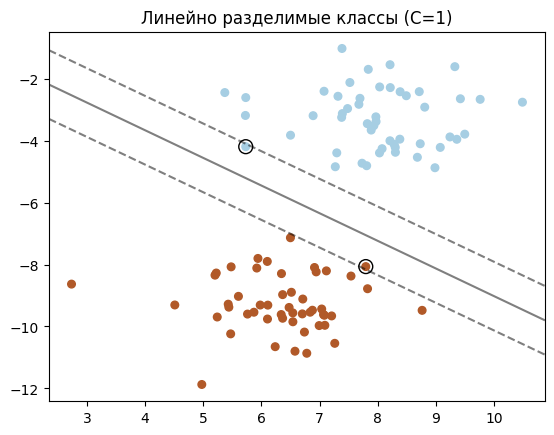

     pcost       dcost       gap    pres   dres
 0: -3.6876e+01 -1.9666e+02  8e+02  2e+00  1e-15
 1: -2.4537e+01 -1.1355e+02  1e+02  1e-01  1e-15
 2: -2.6822e+01 -4.2392e+01  2e+01  1e-02  1e-15
 3: -2.9978e+01 -3.5257e+01  6e+00  4e-03  1e-15
 4: -3.1369e+01 -3.2858e+01  2e+00  8e-04  1e-15
 5: -3.1818e+01 -3.2142e+01  3e-01  1e-04  2e-15
 6: -3.1942e+01 -3.1958e+01  2e-02  5e-06  2e-15
 7: -3.1948e+01 -3.1949e+01  2e-04  7e-08  2e-15
 8: -3.1948e+01 -3.1948e+01  2e-06  7e-10  2e-15
Optimal solution found.


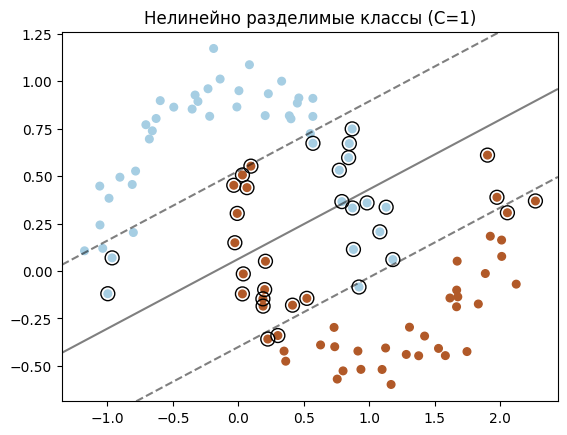

     pcost       dcost       gap    pres   dres
 0: -9.9998e+01 -2.0086e+02  4e+02  1e+00  1e-15
 1: -8.2724e+01 -1.3596e+02  5e+01  3e-16  1e-15
 2: -9.8305e+01 -1.0037e+02  2e+00  2e-16  2e-15
 3: -9.9916e+01 -9.9987e+01  7e-02  2e-16  2e-15
 4: -9.9974e+01 -9.9975e+01  7e-04  2e-16  2e-15
 5: -9.9975e+01 -9.9975e+01  7e-06  2e-16  2e-15
Optimal solution found.


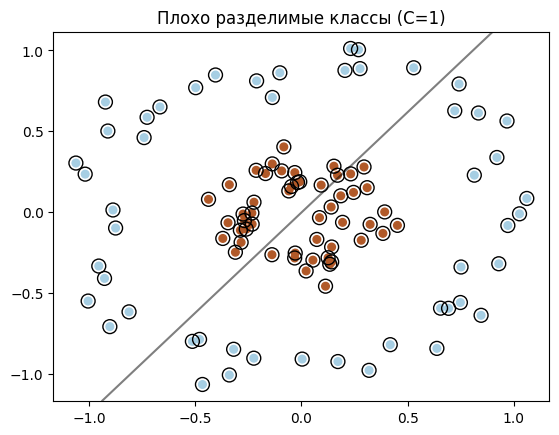

     pcost       dcost       gap    pres   dres
 0: -5.1025e+01 -6.1582e+03  2e+04  8e-01  5e-13
 1: -8.3939e+00 -1.2870e+03  2e+03  6e-02  4e-13
 2:  1.1059e+01 -1.7491e+02  3e+02  7e-03  2e-13
 3:  5.3530e+00 -9.6752e+00  2e+01  6e-05  4e-14
 4:  3.4233e-01 -1.6046e+00  2e+00  2e-16  7e-15
 5: -2.1385e-01 -1.0281e+00  8e-01  2e-16  8e-15
 6: -7.1262e-01 -1.1393e+00  4e-01  2e-16  2e-14
 7: -9.0846e-01 -9.1456e-01  6e-03  2e-16  1e-14
 8: -9.1109e-01 -9.1115e-01  6e-05  2e-16  2e-14
 9: -9.1112e-01 -9.1112e-01  6e-07  2e-16  2e-14
Optimal solution found.


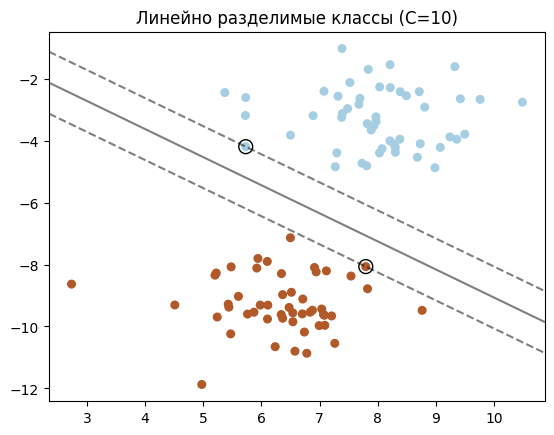

     pcost       dcost       gap    pres   dres
 0: -1.3832e+02 -5.0293e+03  9e+03  4e-01  9e-15
 1: -1.3146e+02 -9.2585e+02  8e+02  4e-03  9e-15
 2: -2.1910e+02 -4.1060e+02  2e+02  6e-04  9e-15
 3: -2.4341e+02 -3.7875e+02  1e+02  4e-04  9e-15
 4: -2.6180e+02 -3.4475e+02  8e+01  2e-04  1e-14
 5: -2.7631e+02 -3.2162e+02  5e+01  8e-05  8e-15
 6: -2.8131e+02 -3.1336e+02  3e+01  5e-05  9e-15
 7: -2.8443e+02 -3.0492e+02  2e+01  2e-05  9e-15
 8: -2.9045e+02 -2.9733e+02  7e+00  2e-16  1e-14
 9: -2.9306e+02 -2.9362e+02  6e-01  2e-16  1e-14
10: -2.9328e+02 -2.9334e+02  6e-02  2e-16  1e-14
11: -2.9330e+02 -2.9331e+02  2e-02  2e-16  1e-14
12: -2.9330e+02 -2.9330e+02  2e-04  2e-16  2e-14
Optimal solution found.


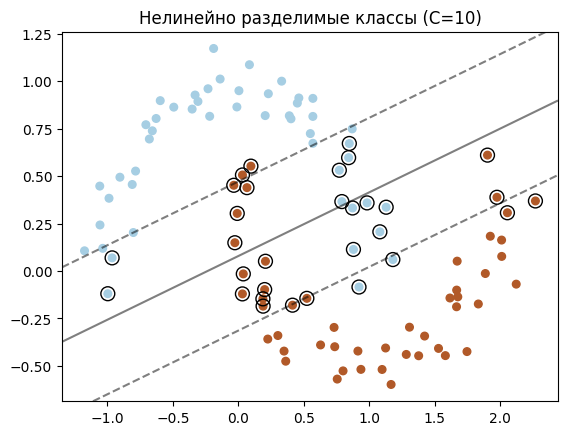

     pcost       dcost       gap    pres   dres
 0: -5.4999e+02 -2.0472e+03  1e+03  0e+00  8e-15
 1: -7.9644e+02 -1.0111e+03  2e+02  2e-16  1e-14
 2: -9.9008e+02 -1.0020e+03  1e+01  2e-16  1e-14
 3: -9.9728e+02 -9.9881e+02  2e+00  2e-16  1e-14
 4: -9.9770e+02 -9.9891e+02  1e+00  2e-16  1e-14
 5: -9.9838e+02 -9.9843e+02  5e-02  3e-16  1e-14
 6: -9.9841e+02 -9.9841e+02  5e-04  2e-16  1e-14
Optimal solution found.


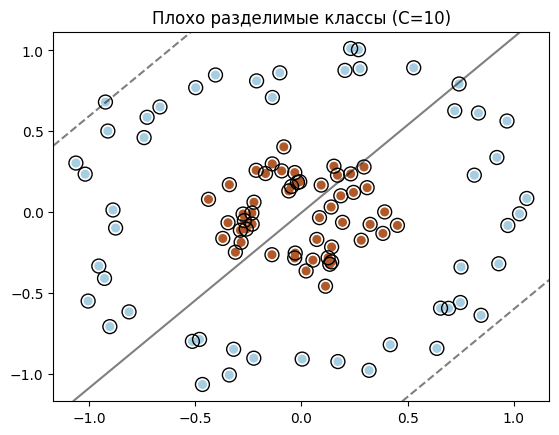

     pcost       dcost       gap    pres   dres
 0: -5.6628e+00 -1.5214e+01  4e+02  2e+01  5e-14
 1: -1.1024e+00 -1.3616e+01  3e+01  1e+00  5e-14
 2: -4.5905e-01 -4.5615e+00  5e+00  9e-02  7e-15
 3: -2.8388e-01 -8.4465e-01  7e-01  1e-02  3e-15
 4: -3.3780e-01 -5.5355e-01  2e-01  3e-03  3e-15
 5: -3.6743e-01 -4.3508e-01  7e-02  7e-04  3e-15
 6: -3.7981e-01 -4.0411e-01  3e-02  9e-05  3e-15
 7: -3.8923e-01 -3.8987e-01  7e-04  2e-06  4e-15
 8: -3.8946e-01 -3.8947e-01  7e-06  3e-08  5e-15
 9: -3.8947e-01 -3.8947e-01  7e-08  3e-10  5e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0927e+01 -2.0462e+01  6e+02  2e+01  1e-15
 1: -3.6005e+00 -1.9363e+01  2e+01  2e-01  8e-16
 2: -3.6977e+00 -5.6604e+00  2e+00  1e-02  5e-16
 3: -4.2574e+00 -4.6775e+00  4e-01  2e-03  5e-16
 4: -4.4225e+00 -4.5069e+00  9e-02  3e-04  5e-16
 5: -4.4520e+00 -4.4714e+00  2e-02  6e-05  5e-16
 6: -4.4600e+00 -4.4621e+00  2e-03  5e-06  5e-16
 7: -4.4609e+00 -4.4611e+00  2e-04  4e-07  5e-1

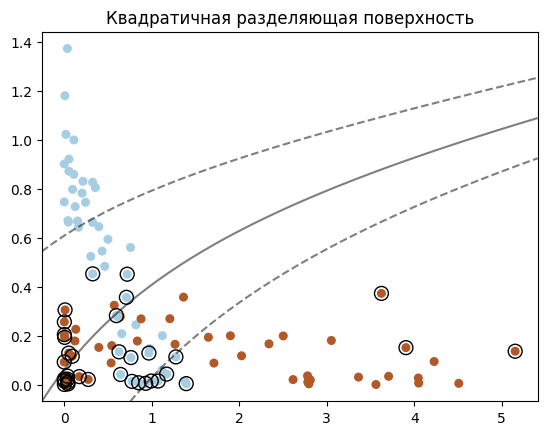

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as cp
from sklearn.datasets import make_blobs, make_moons, make_circles

# Функция для обучения линейного SVM
def train_svm(X, y, C):
    n_samples, n_features = X.shape  # Определяем количество образцов и признаков
    # Преобразование меток классов из {0, 1} в {-1, 1}
    y = y * 2 - 1  # Преобразуем 0, 1 в -1, 1

    # Определение матриц для задачи квадратичной оптимизации (QP)
    K = np.dot(X, X.T)  # Квадратичная матрица (ядерная матрица)
    P = cp.matrix(np.outer(y, y) * K)  # Матрица P для QP
    q = cp.matrix(-np.ones(n_samples))  # Вектор q для QP
    G = cp.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))  # Матрица G для неравенств
    h = cp.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))  # Вектор h для неравенств

    # Решение задачи QP
    solution = cp.solvers.qp(P, q, G, h)  # Решаем QP задачу
    alpha = np.array(solution['x']).flatten()  # Получаем значения альфа

    # Определение опорных векторов
    sv = alpha > 1e-5  # Опорные векторы имеют альфа > 1e-5
    w = np.sum((alpha[sv] * y[sv])[:, np.newaxis] * X[sv], axis=0)  # Вектор весов
    b = np.mean(y[sv] - np.dot(X[sv], w))  # Смещение

    return w, b, alpha  # Возвращаем вектор весов, смещение и альфа

# Функция для визуализации
def plot_svm(X, y, w, b, alpha, title, is_transformed=False):
    # Визуализация данных
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)  # Рисуем точки данных
    plt.scatter(X[alpha > 1e-5][:, 0], X[alpha > 1e-5][:, 1], s=100, facecolors='none', edgecolors='k')  # Рисуем опорные векторы

    # Построение разделяющей гиперплоскости
    xlim = plt.xlim()  # Ограничения по оси X
    ylim = plt.ylim()  # Ограничения по оси Y

    xx = np.linspace(xlim[0], xlim[1], 50)  # Генерируем точки по оси X
    yy = np.linspace(ylim[0], ylim[1], 50)  # Генерируем точки по оси Y
    YY, XX = np.meshgrid(yy, xx)  # Создаем сетку
    xy = np.vstack([XX.ravel(), YY.ravel()]).T  # Формируем координаты сетки

    if is_transformed:
        xy = feature_transform(xy)  # Применяем преобразование признаков к сетке

    Z = np.dot(xy, w) + b  # Вычисляем значения функции на сетке
    Z = Z.reshape(XX.shape)  # Приводим к нужной форме

    # Рисуем контуры
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)  # Разделяющая гиперплоскость
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.5, linestyles='dashed')  # Линии уровня
    plt.title(title)  # Заголовок графика
    plt.xlim(xlim)  # Устанавливаем ограничения по оси X
    plt.ylim(ylim)  # Устанавливаем ограничения по оси Y
    plt.show()  # Показываем график

# Генерация выборок
# 1. Линейно разделимые классы
X1, y1 = make_blobs(n_samples=100, centers=2, random_state=6)
# 2. Нелинейно разделимые классы
X2, y2 = make_moons(n_samples=100, noise=0.1, random_state=42)
# 3. Плохо разделимые классы
X3, y3 = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=1)

# Обучение и тестирование SVM на выборках
C_values = [0.1, 1, 10]  # Различные значения параметра C для регуляризации

for C in C_values:
    # Линейно разделимые классы
    w1, b1, alpha1 = train_svm(X1, y1, C)  # Обучаем SVM
    plot_svm(X1, y1, w1, b1, alpha1, f'Линейно разделимые классы (C={C})')  # Визуализируем

    # Нелинейно разделимые классы
    w2, b2, alpha2 = train_svm(X2, y2, C)  # Обучаем SVM
    plot_svm(X2, y2, w2, b2, alpha2, f'Нелинейно разделимые классы (C={C})')  # Визуализируем

    # Плохо разделимые классы
    w3, b3, alpha3 = train_svm(X3, y3, C)  # Обучаем SVM
    plot_svm(X3, y3, w3, b3, alpha3, f'Плохо разделимые классы (C={C})')  # Визуализируем

# Шаг 4: Анализ числа опорных векторов
for C in C_values:
    _, _, alpha1 = train_svm(X1, y1, C)  # Обучаем SVM
    _, _, alpha2 = train_svm(X2, y2, C)  # Обучаем SVM
    _, _, alpha3 = train_svm(X3, y3, C)  # Обучаем SVM
    # Выводим количество опорных векторов для каждого из наборов данных
    print(f'C={C}: Линейно разделимые: {np.sum(alpha1 > 1e-5)}, Нелинейно разделимые: {np.sum(alpha2 > 1e-5)}, Плохо разделимые: {np.sum(alpha3 > 1e-5)}')

# Шаг 5: Явное преобразование признаков для квадратичной разделяющей поверхности
def feature_transform(X):
    # Преобразование признаков в квадратичное пространство
    return np.column_stack((X[:, 0]**2, X[:, 1]**2, X[:, 0] * X[:, 1], X[:, 0], X[:, 1]))

# Применение преобразования к нелинейно разделимым классам
X_transformed = feature_transform(X2)
w_quad, b_quad, alpha_quad = train_svm(X_transformed, y2, 1)  # Обучаем SVM на преобразованных данных
plot_svm(X_transformed, y2, w_quad, b_quad, alpha_quad, 'Квадратичная разделяющая поверхность', is_transformed=True)  # Визуализируем


#### Задание 3
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as cp
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import rbf_kernel

# Определение ядровой функции
def kernel(X, Z, kernel_type='linear', degree=3, gamma=0.1):
    if kernel_type == 'linear':
        return np.dot(X, Z.T)
    elif kernel_type == 'polynomial':
        return (np.dot(X, Z.T) + 1) ** degree
    elif kernel_type == 'rbf':
        return rbf_kernel(X, Z, gamma=gamma)
    else:
        raise ValueError("Unknown kernel type")



Функция kernel вычисляет значение ядра для пары данных.
X и Z — матрицы данных.
kernel_type — тип ядра ('linear', 'polynomial', 'rbf').
degree — степень полиномиального ядра.
gamma — параметр гауссовского RBF-ядра.
В зависимости от kernel_type функция возвращает соответствующее ядро:
Линейное ядро: скалярное произведение векторов.
Полиномиальное ядро: скалярное произведение с добавлением 1, возведенное в степень degree.
Гауссовское RBF-ядро: вычисляется с использованием функции rbf_kernel из sklearn.

In [15]:
# Функция для обучения ядрового SVM
def train_kernel_svm(X, y, C, kernel_type='linear', degree=3, gamma=0.1):
    n_samples = X.shape[0]  # Получаем количество образцов
    K = kernel(X, X, kernel_type, degree, gamma)  # Вычисляем матрицу ядра для данных X
    y = y * 2 - 1  # Преобразуем метки классов из {0, 1} в {-1, 1}

    # Определение матриц для задачи квадратичной оптимизации (QP)
    P = cp.matrix(np.outer(y, y) * K)  # Матрица P: элемент-wise умножение матрицы ядра на вектор меток
    q = cp.matrix(-np.ones(n_samples))  # Вектор q: содержит -1 для всех элементов
    G = cp.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))  # Матрица G: объединение матриц для неравенств
    h = cp.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))  # Вектор h: объединение нулей и значений C

    # Решение задачи QP
    solution = cp.solvers.qp(P, q, G, h)  # Используем cvxopt для решения задачи квадратичного программирования
    alpha = np.array(solution['x']).flatten()  # Получаем вектор альфа из решения

    # Определение опорных векторов
    sv = alpha > 1e-5  # Опорные векторы: альфа больше 1e-5
    w = np.sum((alpha[sv] * y[sv])[:, np.newaxis] * K[sv, :], axis=0)  # Вычисляем вектор весов
    b = np.mean(y[sv] - np.dot(K[sv, :], w))  # Вычисляем смещение как среднее отклонение

    return w, b, alpha  # Возвращаем вектор весов, смещение и альфа


Функция train_kernel_svm обучает SVM с использованием ядра:

*   Вычисляет матрицу ядра для входных данных.
*   Преобразует метки в {-1, 1}.
*   Создает матрицы для решения QP задачи.
*   Использует cvxopt для решения QP задачи и получения значений alpha.
*   Находит опорные векторы, вычисляет вектор весов и смещение.











In [16]:
# Функция для визуализации
def plot_kernel_svm(X, y, w, b, alpha, kernel_type, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)  # Рисуем данные
    plt.scatter(X[alpha > 1e-5][:, 0], X[alpha > 1e-5][:, 1], s=100, facecolors='none', edgecolors='k')  # Выделяем опорные векторы

    # Построение разделяющей гиперплоскости
    xlim = plt.xlim()  # Получаем ограничения по оси X
    ylim = plt.ylim()  # Получаем ограничения по оси Y

    xx = np.linspace(xlim[0], xlim[1], 50)  # Генерируем точки по оси X
    yy = np.linspace(ylim[0], ylim[1], 50)  # Генерируем точки по оси Y
    YY, XX = np.meshgrid(yy, xx)  # Создаем сетку
    xy = np.vstack([XX.ravel(), YY.ravel()]).T  # Формируем координаты сетки

    K = kernel(xy, X, kernel_type)  # Вычисляем матрицу ядра для сетки
    Z = np.dot(K, w) + b  # Вычисляем значения функции на сетке
    Z = Z.reshape(XX.shape)  # Приводим к нужной форме

    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)  # Разделяющая гиперплоскость
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.5, linestyles='dashed')  # Линии уровня
    plt.title(title)  # Заголовок графика
    plt.xlim(xlim)  # Устанавливаем ограничения по оси X
    plt.ylim(ylim)  # Устанавливаем ограничения по оси Y
    plt.show()  # Показываем график

Функция plot_kernel_svm визуализирует результаты:
* Рисует точки данных и опорные векторы.
* Генерирует сетку точек, на которых вычисляется функция решения.
* Рисует разделяющую гиперплоскость и линии уровня.”

     pcost       dcost       gap    pres   dres
 0: -2.2758e+01 -2.1835e+01  7e+02  3e+01  1e-15
 1: -3.7737e+00 -2.0730e+01  3e+01  3e-01  1e-15
 2: -3.7634e+00 -5.7115e+00  2e+00  4e-03  5e-16
 3: -4.3936e+00 -4.8023e+00  4e-01  6e-04  4e-16
 4: -4.5625e+00 -4.6539e+00  9e-02  1e-04  5e-16
 5: -4.5954e+00 -4.6213e+00  3e-02  2e-05  4e-16
 6: -4.6067e+00 -4.6098e+00  3e-03  2e-06  4e-16
 7: -4.6081e+00 -4.6082e+00  7e-05  3e-08  5e-16
 8: -4.6082e+00 -4.6082e+00  7e-07  3e-10  6e-16
Optimal solution found.


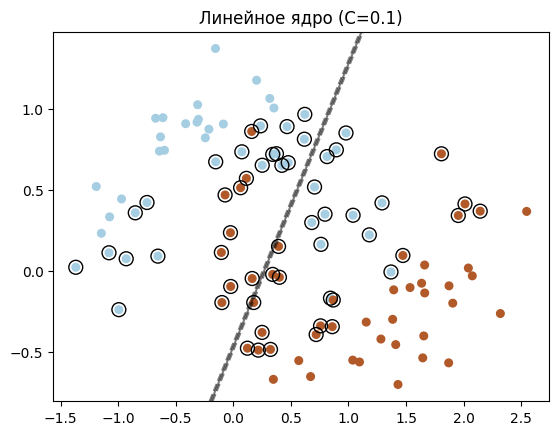

     pcost       dcost       gap    pres   dres
 0: -4.0346e+01 -2.2305e+02  1e+03  3e+00  2e-15
 1: -2.6200e+01 -1.3684e+02  1e+02  2e-01  2e-15
 2: -2.7690e+01 -4.4808e+01  2e+01  2e-02  2e-15
 3: -3.1226e+01 -3.6606e+01  6e+00  4e-03  1e-15
 4: -3.2550e+01 -3.4821e+01  2e+00  1e-03  1e-15
 5: -3.3336e+01 -3.3824e+01  5e-01  2e-04  1e-15
 6: -3.3444e+01 -3.3643e+01  2e-01  5e-05  1e-15
 7: -3.3508e+01 -3.3565e+01  6e-02  1e-05  1e-15
 8: -3.3533e+01 -3.3534e+01  1e-03  1e-07  2e-15
 9: -3.3534e+01 -3.3534e+01  2e-05  1e-09  1e-15
Optimal solution found.


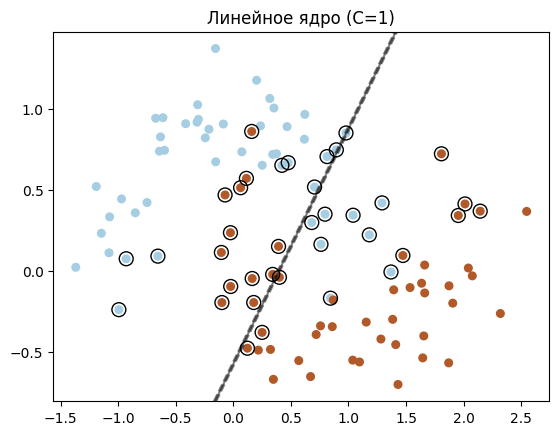

     pcost       dcost       gap    pres   dres
 0: -1.6514e+02 -5.7049e+03  1e+04  5e-01  1e-14
 1: -1.4533e+02 -1.1379e+03  1e+03  2e-16  9e-15
 2: -2.3395e+02 -4.5687e+02  2e+02  1e-16  6e-15
 3: -2.6536e+02 -3.9675e+02  1e+02  2e-16  8e-15
 4: -2.8840e+02 -3.4654e+02  6e+01  2e-16  6e-15
 5: -2.9717e+02 -3.3717e+02  4e+01  2e-16  7e-15
 6: -3.0285e+02 -3.2913e+02  3e+01  2e-16  8e-15
 7: -3.0542e+02 -3.2462e+02  2e+01  2e-16  9e-15
 8: -3.0944e+02 -3.1738e+02  8e+00  2e-16  1e-14
 9: -3.1164e+02 -3.1473e+02  3e+00  2e-16  1e-14
10: -3.1296e+02 -3.1303e+02  7e-02  2e-16  1e-14
11: -3.1299e+02 -3.1299e+02  7e-04  2e-16  1e-14
12: -3.1299e+02 -3.1299e+02  7e-06  2e-16  8e-15
Optimal solution found.


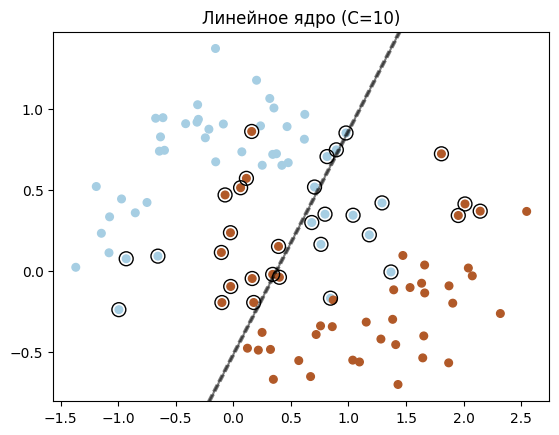

     pcost       dcost       gap    pres   dres
 0: -2.2244e+01 -2.1387e+01  7e+02  3e+01  6e-15
 1: -3.6774e+00 -2.0128e+01  3e+01  7e-01  4e-15
 2: -3.0663e+00 -7.2072e+00  4e+00  2e-16  9e-16
 3: -3.5565e+00 -4.5906e+00  1e+00  2e-16  6e-16
 4: -3.8479e+00 -4.0781e+00  2e-01  2e-16  7e-16
 5: -3.9346e+00 -3.9556e+00  2e-02  2e-16  8e-16
 6: -3.9427e+00 -3.9457e+00  3e-03  2e-16  9e-16
 7: -3.9440e+00 -3.9441e+00  9e-05  2e-16  8e-16
 8: -3.9441e+00 -3.9441e+00  1e-06  2e-16  7e-16
Optimal solution found.


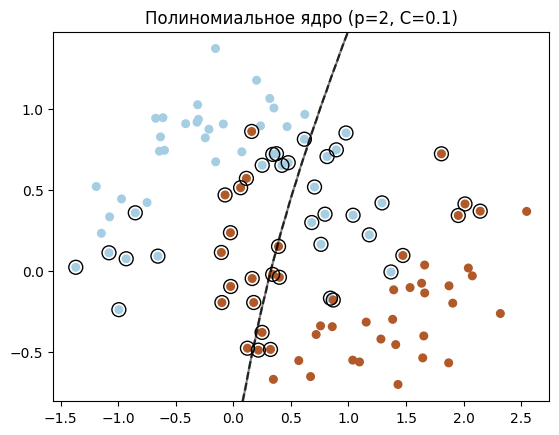

     pcost       dcost       gap    pres   dres
 0: -3.9866e+01 -2.1943e+02  1e+03  3e+00  9e-15
 1: -2.6640e+01 -1.3435e+02  2e+02  2e-01  8e-15
 2: -2.6361e+01 -4.1915e+01  2e+01  2e-02  5e-15
 3: -2.9343e+01 -3.5994e+01  7e+00  5e-03  3e-15
 4: -3.0811e+01 -3.3774e+01  3e+00  2e-03  4e-15
 5: -3.1603e+01 -3.2485e+01  9e-01  4e-04  4e-15
 6: -3.1901e+01 -3.2036e+01  1e-01  5e-05  4e-15
 7: -3.1944e+01 -3.1983e+01  4e-02  6e-06  4e-15
 8: -3.1961e+01 -3.1962e+01  8e-04  1e-07  4e-15
 9: -3.1962e+01 -3.1962e+01  8e-06  1e-09  4e-15
Optimal solution found.


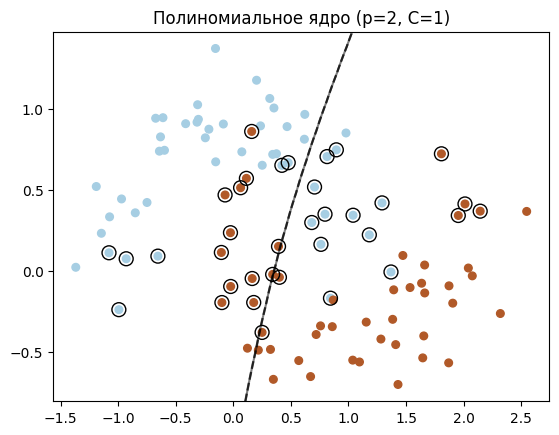

     pcost       dcost       gap    pres   dres
 0: -1.8748e+02 -5.7065e+03  1e+04  5e-01  5e-14
 1: -1.6547e+02 -1.1705e+03  1e+03  2e-16  5e-14
 2: -2.2830e+02 -4.2996e+02  2e+02  2e-16  3e-14
 3: -2.5568e+02 -3.8978e+02  1e+02  2e-16  3e-14
 4: -2.7789e+02 -3.4353e+02  7e+01  2e-16  3e-14
 5: -2.9221e+02 -3.2448e+02  3e+01  2e-16  4e-14
 6: -2.9628e+02 -3.1570e+02  2e+01  2e-16  3e-14
 7: -3.0023e+02 -3.0920e+02  9e+00  2e-16  3e-14
 8: -3.0133e+02 -3.0681e+02  5e+00  2e-16  4e-14
 9: -3.0297e+02 -3.0431e+02  1e+00  2e-16  4e-14
10: -3.0339e+02 -3.0378e+02  4e-01  2e-16  5e-14
11: -3.0356e+02 -3.0357e+02  8e-03  2e-16  4e-14
12: -3.0357e+02 -3.0357e+02  8e-05  2e-16  4e-14
Optimal solution found.


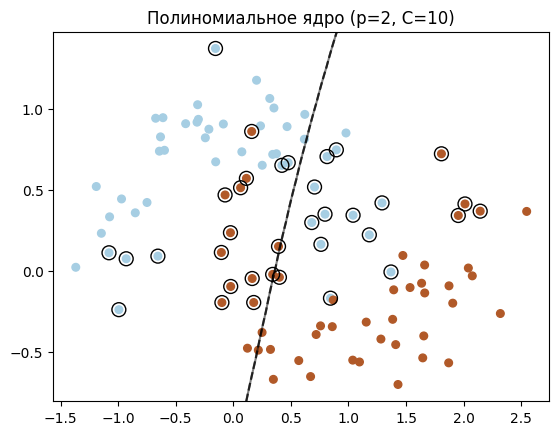

     pcost       dcost       gap    pres   dres
 0: -1.7428e+01 -2.1427e+01  7e+02  3e+01  1e-14
 1: -3.4092e+00 -2.0015e+01  5e+01  1e+00  2e-14
 2: -2.5476e+00 -1.0983e+01  1e+01  2e-01  4e-15
 3: -2.6680e+00 -4.2478e+00  2e+00  2e-02  2e-15
 4: -2.9406e+00 -3.4942e+00  6e-01  6e-03  2e-15
 5: -3.0607e+00 -3.2283e+00  2e-01  1e-03  2e-15
 6: -3.1028e+00 -3.1544e+00  5e-02  4e-04  1e-15
 7: -3.1193e+00 -3.1291e+00  1e-02  4e-05  2e-15
 8: -3.1232e+00 -3.1238e+00  5e-04  1e-06  1e-15
 9: -3.1235e+00 -3.1235e+00  2e-05  3e-08  1e-15
10: -3.1235e+00 -3.1235e+00  4e-07  4e-10  1e-15
Optimal solution found.


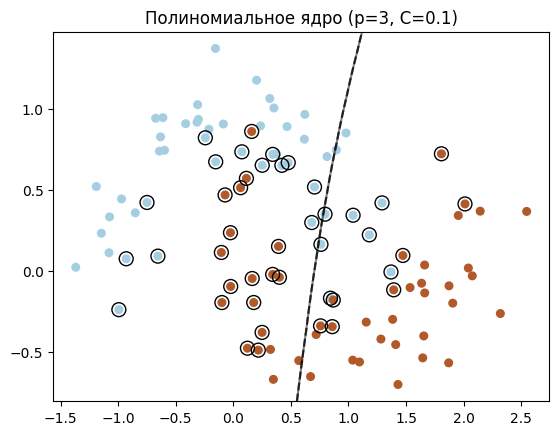

     pcost       dcost       gap    pres   dres
 0: -3.0708e+01 -2.1968e+02  1e+03  3e+00  3e-14
 1: -2.0182e+01 -1.4168e+02  2e+02  4e-01  2e-14
 2: -1.4922e+01 -5.9835e+01  6e+01  8e-02  1e-14
 3: -1.5584e+01 -2.9610e+01  2e+01  2e-02  9e-15
 4: -1.7217e+01 -2.3078e+01  7e+00  6e-03  1e-14
 5: -1.8432e+01 -2.0034e+01  2e+00  9e-04  9e-15
 6: -1.8834e+01 -1.9358e+01  5e-01  6e-05  1e-14
 7: -1.9009e+01 -1.9087e+01  8e-02  8e-06  9e-15
 8: -1.9039e+01 -1.9043e+01  4e-03  2e-16  1e-14
 9: -1.9041e+01 -1.9041e+01  5e-05  2e-16  1e-14
10: -1.9041e+01 -1.9041e+01  5e-07  2e-16  8e-15
Optimal solution found.


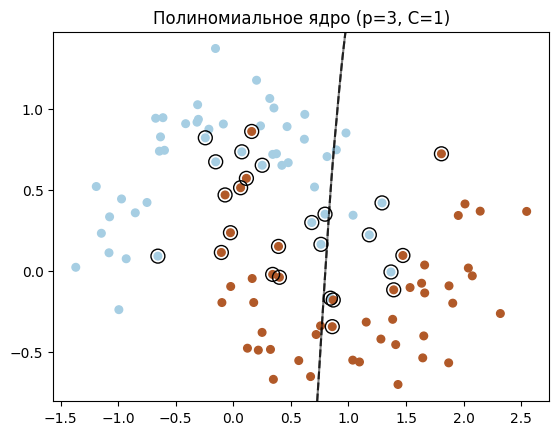

     pcost       dcost       gap    pres   dres
 0: -1.1503e+02 -7.5283e+03  2e+04  8e-01  2e-13
 1: -1.6932e+01 -3.3411e+03  5e+03  1e-01  2e-13
 2:  1.1986e+01 -7.2973e+02  9e+02  2e-02  9e-14
 3: -4.2536e+01 -2.8092e+02  3e+02  5e-03  5e-14
 4: -8.5900e+01 -1.7994e+02  1e+02  1e-03  6e-14
 5: -1.0322e+02 -1.4929e+02  5e+01  3e-04  5e-14
 6: -1.1163e+02 -1.2720e+02  2e+01  5e-05  5e-14
 7: -1.1594e+02 -1.2050e+02  5e+00  5e-06  7e-14
 8: -1.1754e+02 -1.1837e+02  8e-01  5e-07  6e-14
 9: -1.1785e+02 -1.1794e+02  8e-02  5e-08  8e-14
10: -1.1789e+02 -1.1789e+02  1e-03  5e-10  9e-14
11: -1.1789e+02 -1.1789e+02  1e-05  5e-12  6e-14
Optimal solution found.


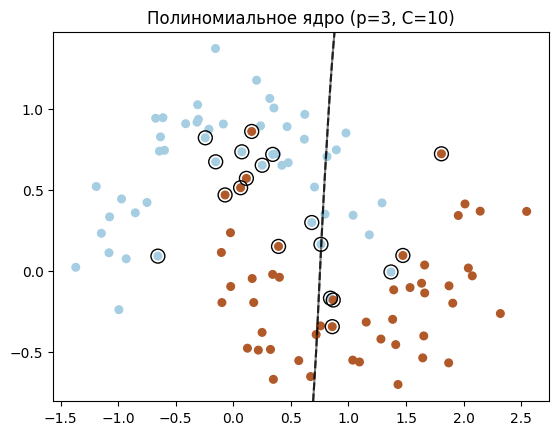

     pcost       dcost       gap    pres   dres
 0: -2.6050e+01 -2.3791e+01  7e+02  3e+01  1e-15
 1: -6.7399e+00 -2.2191e+01  3e+01  4e-01  1e-15
 2: -6.4987e+00 -8.8864e+00  2e+00  2e-16  6e-16
 3: -7.0519e+00 -7.5136e+00  5e-01  2e-16  6e-16
 4: -7.1583e+00 -7.3936e+00  2e-01  2e-16  5e-16
 5: -7.2239e+00 -7.3019e+00  8e-02  2e-16  6e-16
 6: -7.2513e+00 -7.2672e+00  2e-02  2e-16  5e-16
 7: -7.2574e+00 -7.2595e+00  2e-03  2e-16  6e-16
 8: -7.2583e+00 -7.2584e+00  4e-05  2e-16  6e-16
 9: -7.2584e+00 -7.2584e+00  6e-07  2e-16  5e-16
Optimal solution found.


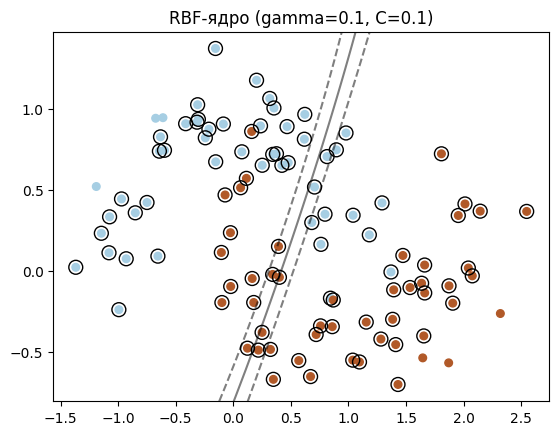

     pcost       dcost       gap    pres   dres
 0: -4.3042e+01 -2.2570e+02  9e+02  2e+00  2e-15
 1: -2.9446e+01 -1.4093e+02  1e+02  4e-16  2e-15
 2: -3.5035e+01 -5.3943e+01  2e+01  2e-16  2e-15
 3: -4.0071e+01 -4.4031e+01  4e+00  2e-16  2e-15
 4: -4.1274e+01 -4.2340e+01  1e+00  2e-16  2e-15
 5: -4.1626e+01 -4.1864e+01  2e-01  2e-16  2e-15
 6: -4.1719e+01 -4.1748e+01  3e-02  2e-16  2e-15
 7: -4.1731e+01 -4.1734e+01  3e-03  2e-16  2e-15
 8: -4.1733e+01 -4.1733e+01  3e-05  2e-16  2e-15
Optimal solution found.


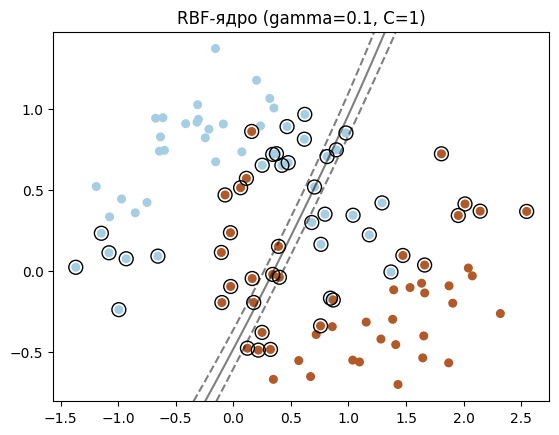

     pcost       dcost       gap    pres   dres
 0:  9.8923e-01 -4.4545e+03  6e+03  2e-01  1e-14
 1: -1.4322e+02 -7.0098e+02  6e+02  1e-02  1e-14
 2: -2.4051e+02 -4.1956e+02  2e+02  2e-03  8e-15
 3: -2.6494e+02 -3.7439e+02  1e+02  9e-04  7e-15
 4: -2.8670e+02 -3.4026e+02  5e+01  4e-04  1e-14
 5: -2.9985e+02 -3.2131e+02  2e+01  1e-04  1e-14
 6: -3.0678e+02 -3.1236e+02  6e+00  2e-05  1e-14
 7: -3.0883e+02 -3.0975e+02  9e-01  3e-06  1e-14
 8: -3.0920e+02 -3.0927e+02  6e-02  2e-16  1e-14
 9: -3.0924e+02 -3.0924e+02  7e-04  2e-16  2e-14
10: -3.0924e+02 -3.0924e+02  7e-06  2e-16  2e-14
Optimal solution found.


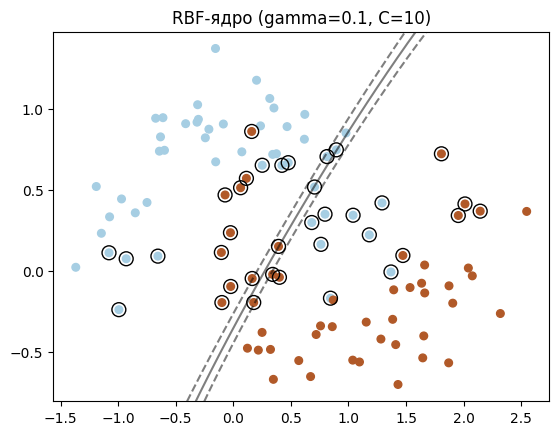

     pcost       dcost       gap    pres   dres
 0: -1.4468e+01 -2.3506e+01  7e+02  3e+01  5e-16
 1: -5.4818e+00 -2.1697e+01  3e+01  7e-01  7e-16
 2: -4.8542e+00 -8.9970e+00  4e+00  2e-16  6e-16
 3: -5.1105e+00 -5.6540e+00  5e-01  1e-16  5e-16
 4: -5.2517e+00 -5.3659e+00  1e-01  2e-16  4e-16
 5: -5.2850e+00 -5.3203e+00  4e-02  2e-16  4e-16
 6: -5.2950e+00 -5.3082e+00  1e-02  2e-16  4e-16
 7: -5.2994e+00 -5.3025e+00  3e-03  2e-16  4e-16
 8: -5.3006e+00 -5.3009e+00  3e-04  2e-16  5e-16
 9: -5.3007e+00 -5.3007e+00  5e-06  2e-16  4e-16
10: -5.3007e+00 -5.3007e+00  7e-08  2e-16  4e-16
Optimal solution found.


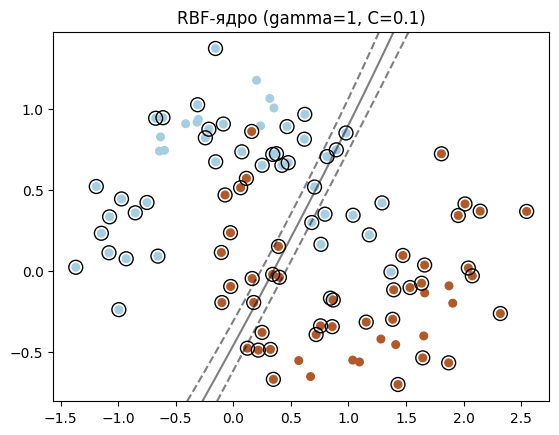

     pcost       dcost       gap    pres   dres
 0: -2.1083e+01 -2.1151e+02  9e+02  2e+00  8e-16
 1: -1.3439e+01 -1.2364e+02  1e+02  6e-03  8e-16
 2: -1.7587e+01 -3.8253e+01  2e+01  1e-03  6e-16
 3: -2.0982e+01 -2.7454e+01  6e+00  2e-04  6e-16
 4: -2.2186e+01 -2.4013e+01  2e+00  4e-05  6e-16
 5: -2.2551e+01 -2.3314e+01  8e-01  1e-05  7e-16
 6: -2.2806e+01 -2.2892e+01  9e-02  5e-07  7e-16
 7: -2.2839e+01 -2.2846e+01  7e-03  9e-09  7e-16
 8: -2.2842e+01 -2.2842e+01  2e-04  2e-10  6e-16
 9: -2.2842e+01 -2.2842e+01  2e-06  2e-12  7e-16
Optimal solution found.


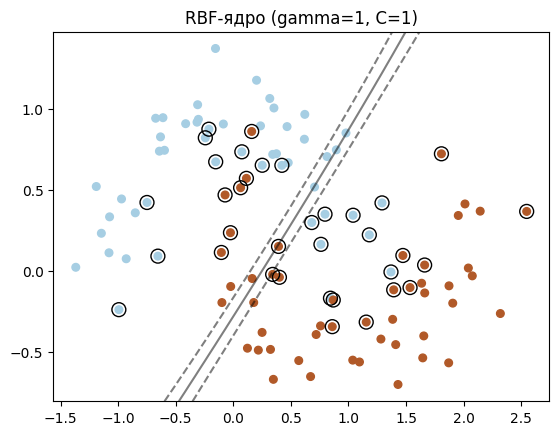

     pcost       dcost       gap    pres   dres
 0:  1.7131e+02 -3.0336e+03  3e+03  5e-17  4e-15
 1: -1.9610e+01 -3.8254e+02  4e+02  2e-16  3e-15
 2: -8.4834e+01 -2.0678e+02  1e+02  2e-16  3e-15
 3: -1.0682e+02 -1.5103e+02  4e+01  2e-16  3e-15
 4: -1.1491e+02 -1.2971e+02  1e+01  2e-16  4e-15
 5: -1.1791e+02 -1.2443e+02  7e+00  2e-16  4e-15
 6: -1.2020e+02 -1.2081e+02  6e-01  2e-16  4e-15
 7: -1.2044e+02 -1.2046e+02  1e-02  2e-16  4e-15
 8: -1.2045e+02 -1.2045e+02  1e-04  2e-16  3e-15
 9: -1.2045e+02 -1.2045e+02  1e-06  2e-16  4e-15
Optimal solution found.


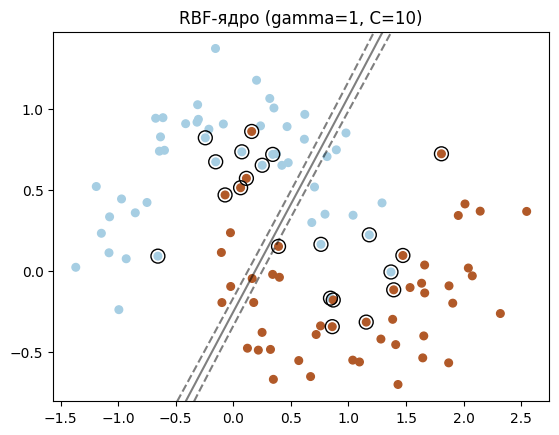

In [17]:
# Генерация выборок
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)  # Генерируем данные с двумя классами

# Параметры
C_values = [0.1, 1, 10]  # Разные значения C для регуляризации
degrees = [2, 3]  # Степени полиномиального ядра
gammas = [0.1, 1]  # Параметры гамма для RBF-ядра

# Линейное ядро
for C in C_values:
    w, b, alpha = train_kernel_svm(X, y, C, kernel_type='linear')  # Обучаем SVM с линейным ядром
    plot_kernel_svm(X, y, w, b, alpha, 'linear', f'Линейное ядро (C={C})')  # Визуализируем результаты

# Полиномиальное ядро
for degree in degrees:
    for C in C_values:
        w, b, alpha = train_kernel_svm(X, y, C, kernel_type='polynomial', degree=degree)  # Обучаем SVM с полиномиальным ядром
        plot_kernel_svm(X, y, w, b, alpha, 'polynomial', f'Полиномиальное ядро (p={degree}, C={C})')  # Визуализируем результаты

# Гауссовское RBF-ядро
for gamma in gammas:
    for C in C_values:
        w, b, alpha = train_kernel_svm(X, y, C, kernel_type='rbf', gamma=gamma)  # Обучаем SVM с RBF-ядром
        plot_kernel_svm(X, y, w, b, alpha, 'rbf', f'RBF-ядро (gamma={gamma}, C={C})')  # Визуализируем результаты

* Генерируем данные для тестирования, с помощью make_moons.
* Определяем параметры для C, степени полинома и gamma.
* Обучаем и визуализируем результаты для различных ядер и параметров.